In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.shape

(700000, 26)

In [ ]:
test.shape

(300000, 25)

In [ ]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [ ]:
test.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [ ]:
train.dtypes

,0
id,int64
age,int64
alcohol_consumption_per_week,int64
physical_activity_minutes_per_week,int64
diet_score,float64
sleep_hours_per_day,float64
screen_time_hours_per_day,float64
bmi,float64
waist_to_hip_ratio,float64
systolic_bp,int64


In [ ]:
train['diagnosed_diabetes'] = train['diagnosed_diabetes'].astype('int')
train.dtypes['diagnosed_diabetes']

dtype('int64')

In [ ]:
#drop columns
train.drop(['employment_status','smoking_status','income_level','ethnicity','education_level'], axis=1, inplace=True)


In [ ]:
test.drop(['employment_status','smoking_status','income_level','ethnicity','education_level'], axis=1, inplace=True)

In [ ]:
train.head()
train.shape

(700000, 21)

In [ ]:
test.shape

(300000, 20)

In [ ]:
from pandas.core.arrays import categorical
numerical_features = train.select_dtypes(include= ['int64','float64']).columns.tolist()

categorical_features = train.select_dtypes(include= ['object']).columns.tolist()

print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

Numerical features: ['id', 'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']
Categorical features: ['gender']


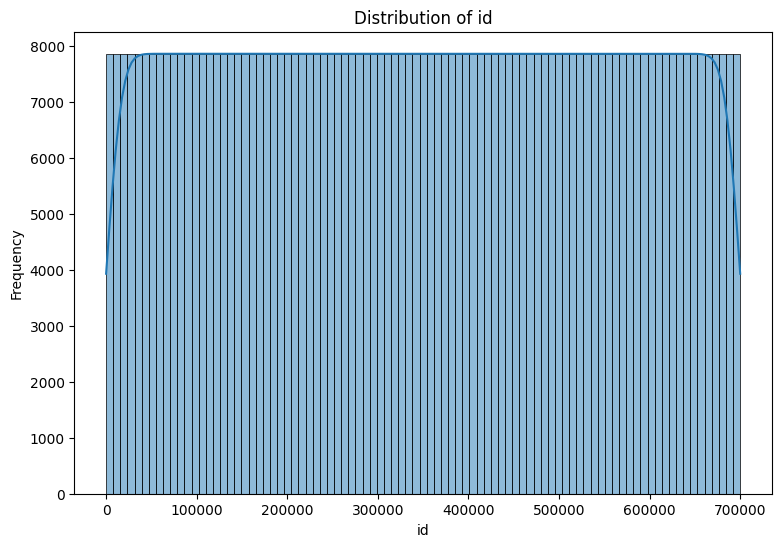

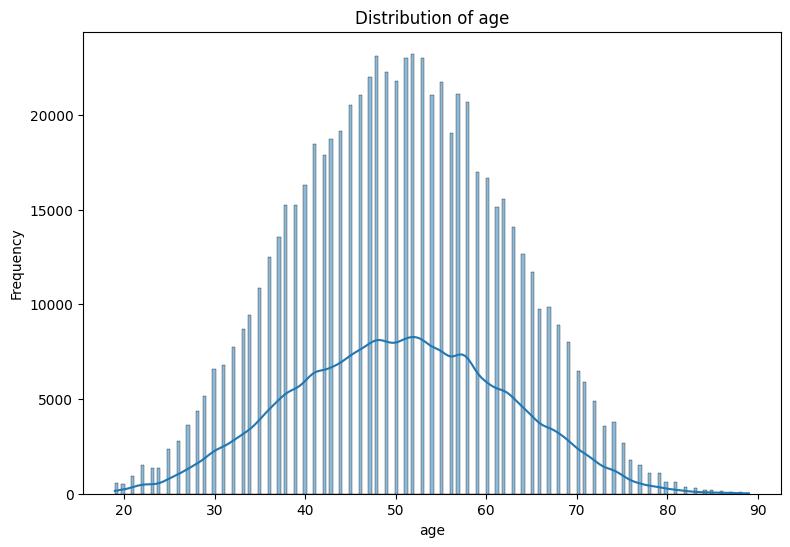

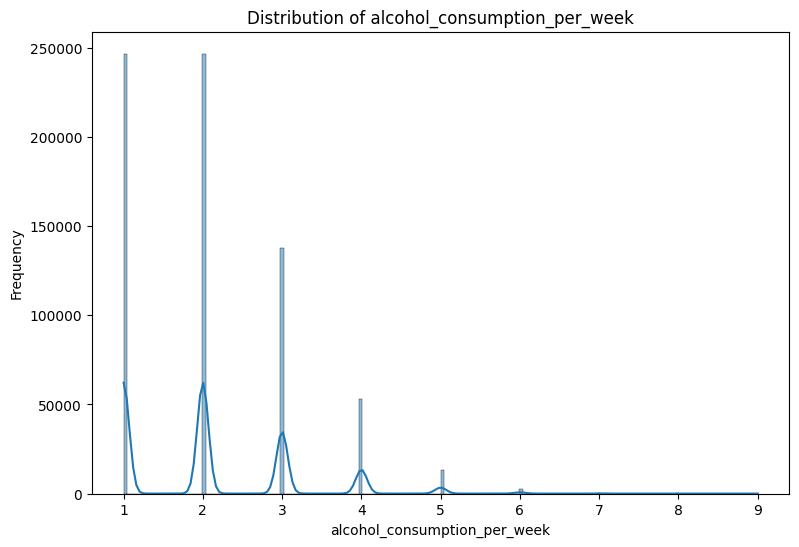

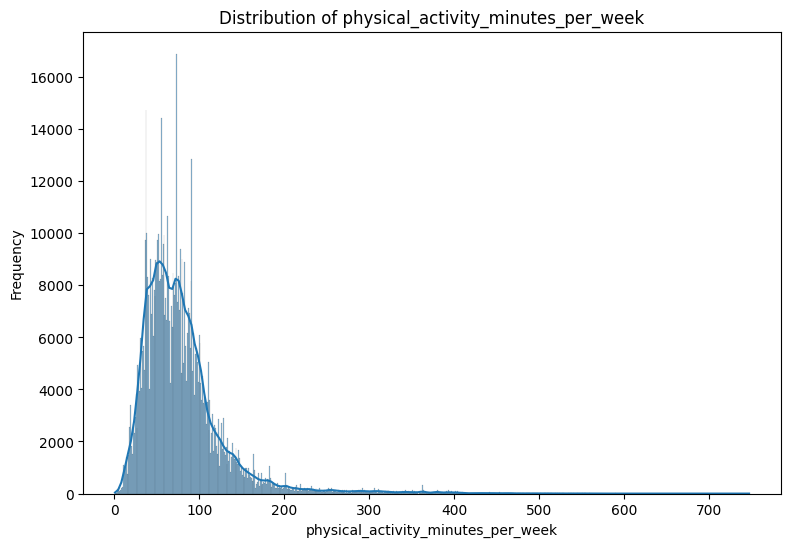

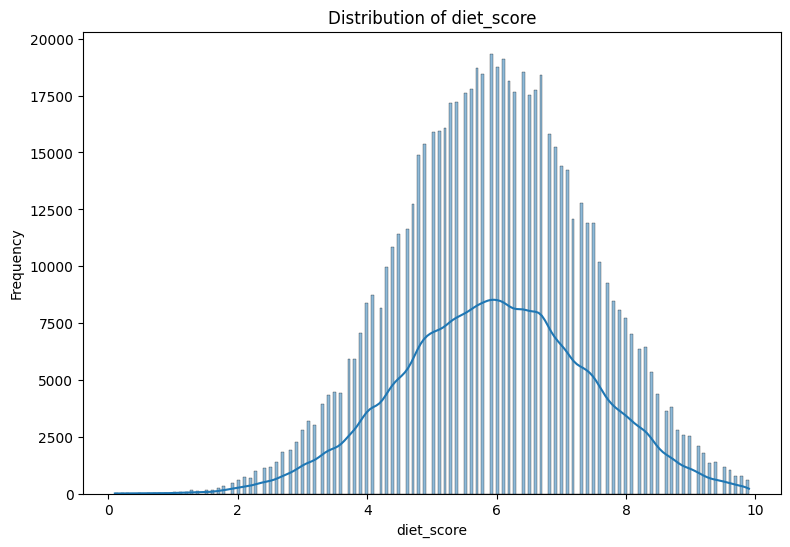

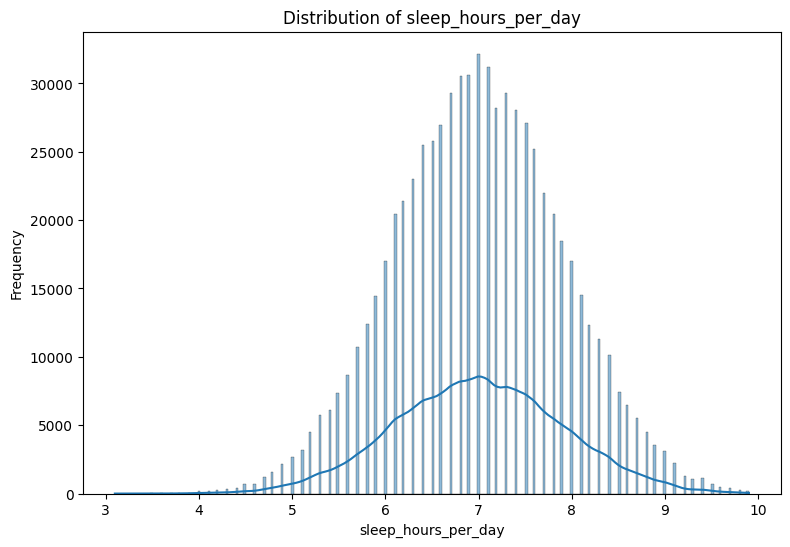

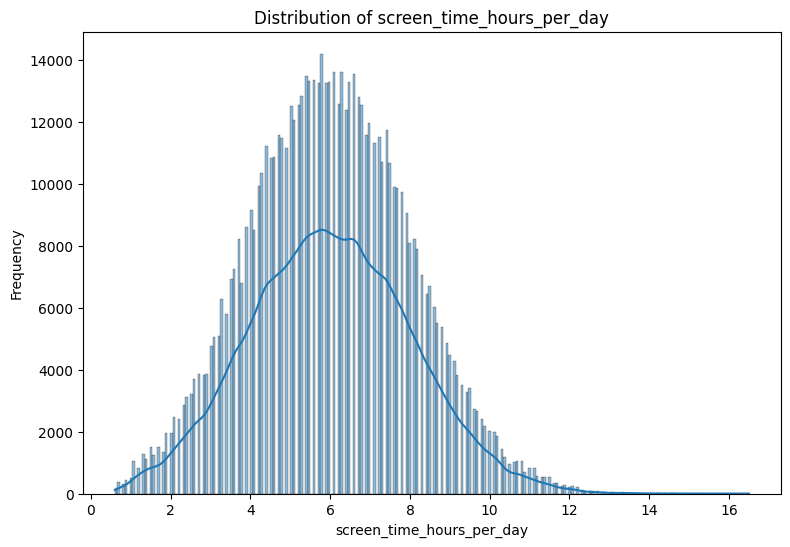

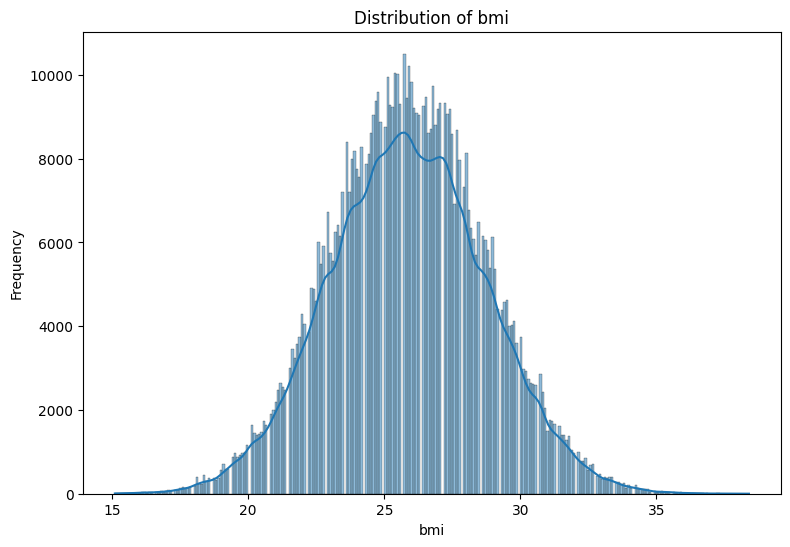

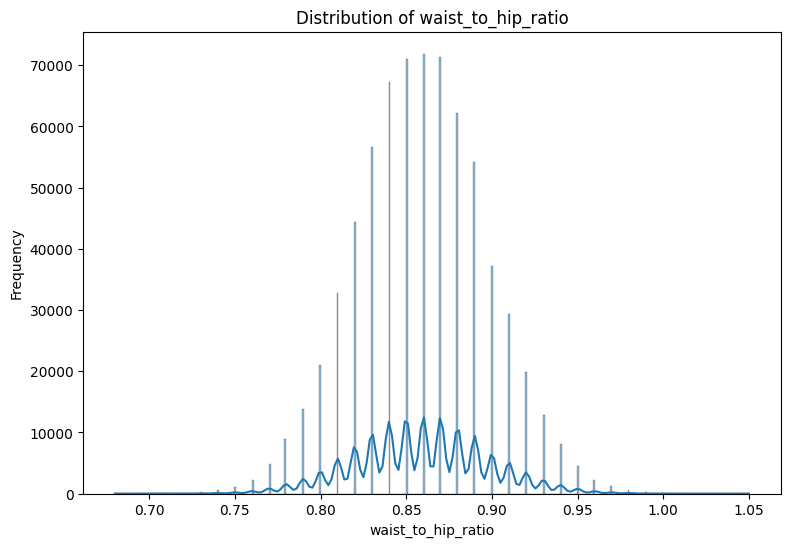

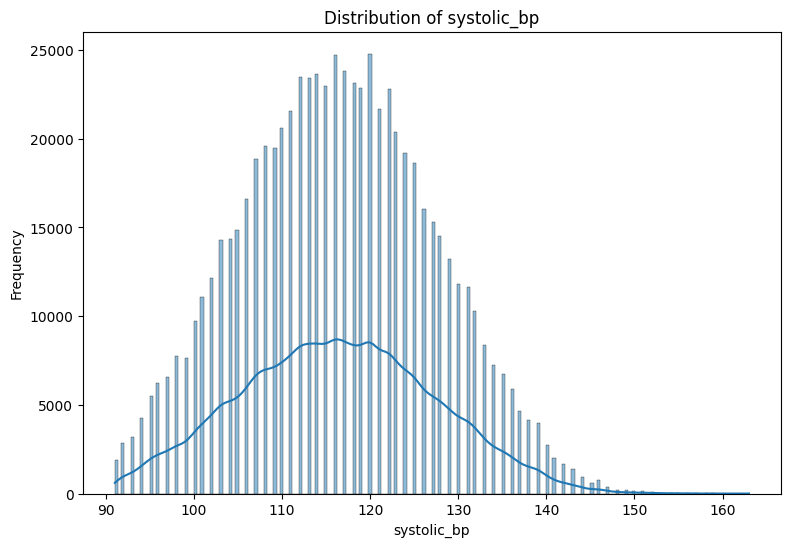

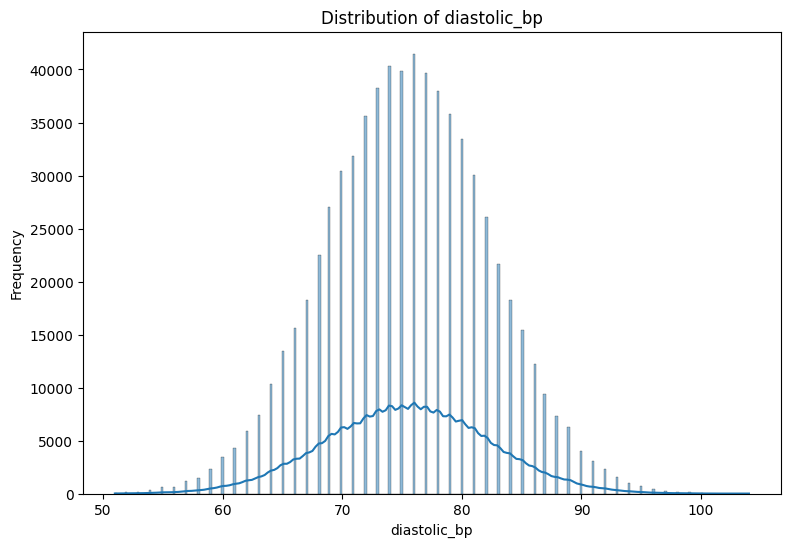

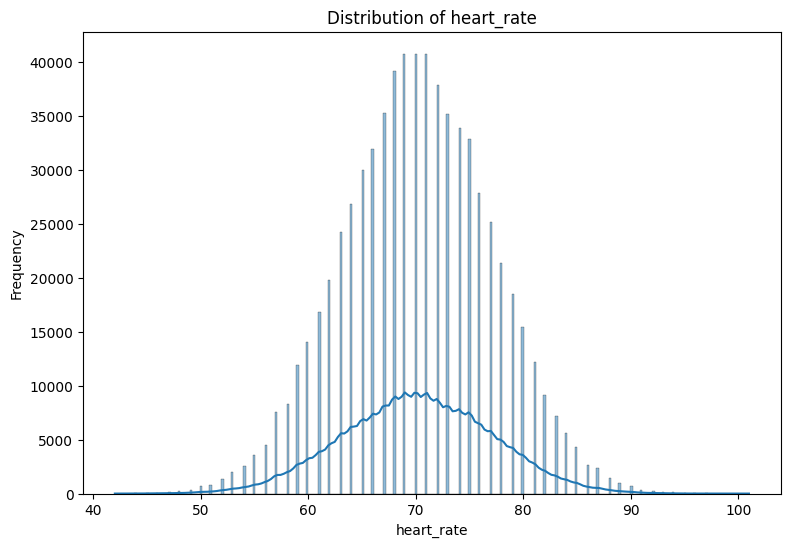

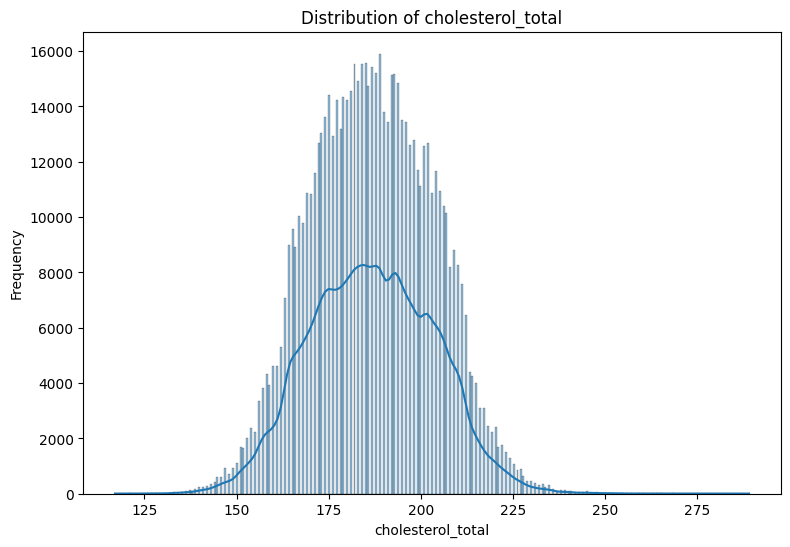

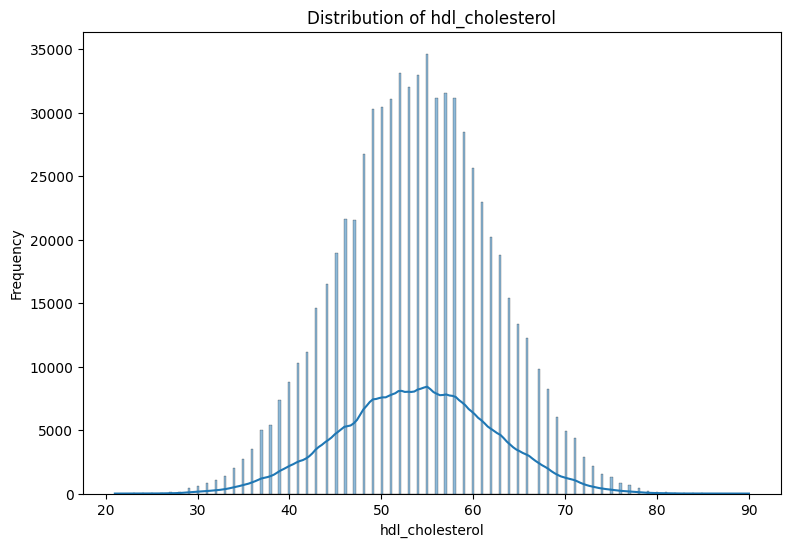

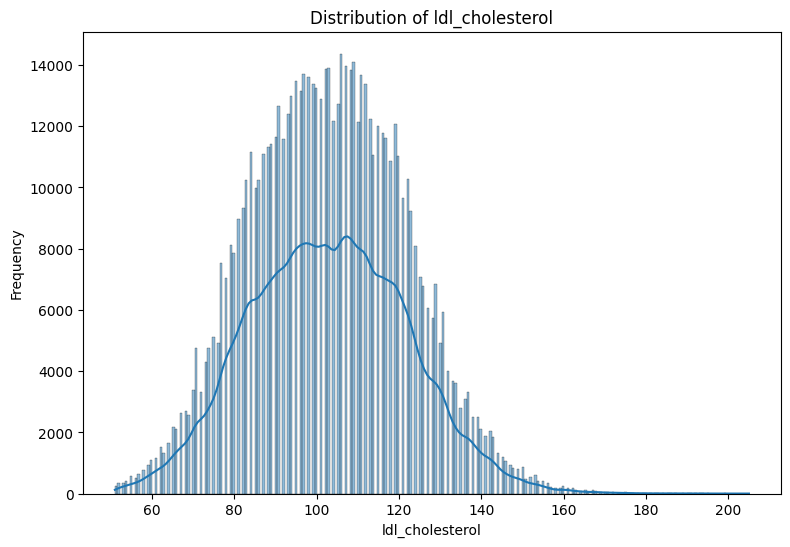

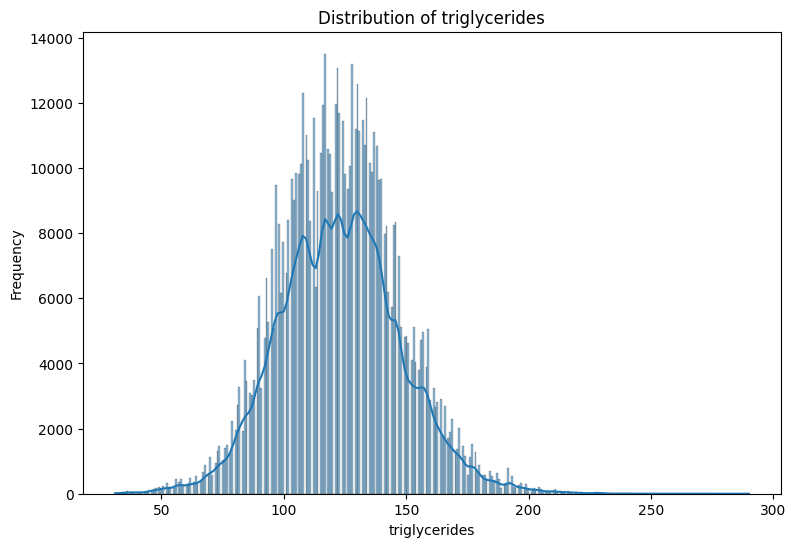

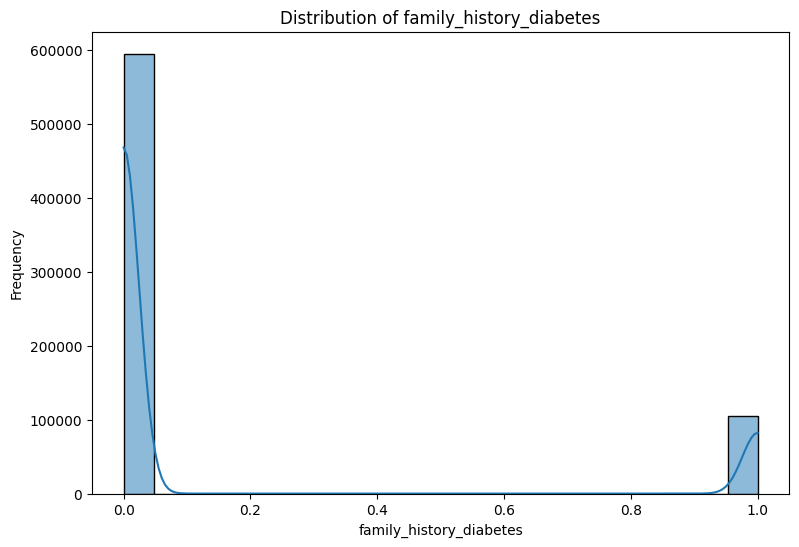

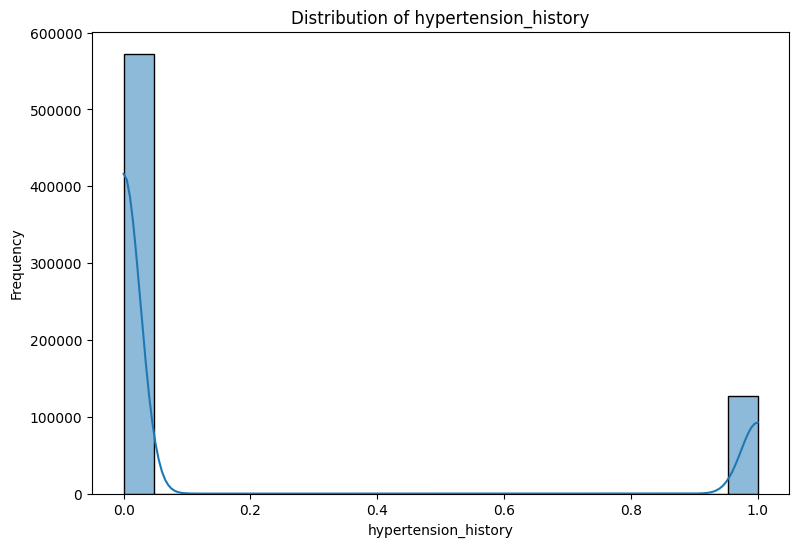

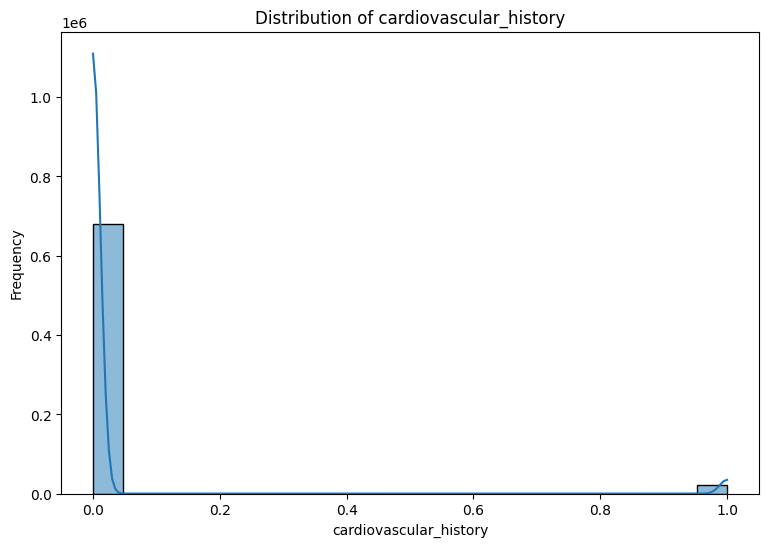

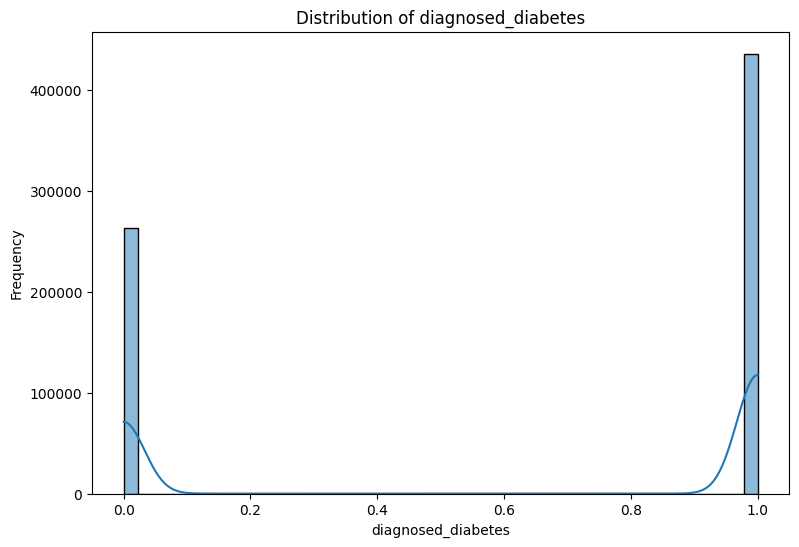

In [ ]:
#univariate numerical features
for col in numerical_features:
  plt.figure(figsize=(9, 6))
  sns.histplot(data=train, x=col, kde=True)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.show()

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for col in categorical_features:
  le = LabelEncoder()
  train[col]= le.fit_transform(train[col])
  test[col]= le.fit_transform(test[col])
  label_encoders[col] = le


In [ ]:
X = train.drop(['diagnosed_diabetes','id'], axis=1)
y = train['diagnosed_diabetes']

In [ ]:
# Align columns
train, test = train.align(test, join='left', axis=1, fill_value=0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#  Class Imbalance Fix
neg, pos = (y == 0).sum(), (y == 1).sum()
scale_pos_weight = neg / pos
scale_pos_weight

np.float64(0.6043749011590462)

In [ ]:
model = XGBClassifier(
    n_estimators=600,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.85,
    colsample_bytree=0.7,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


ROC-AUC: 0.7219997256133419
              precision    recall  f1-score   support

           0       0.53      0.70      0.60     52629
           1       0.77      0.62      0.69     87371

    accuracy                           0.65    140000
   macro avg       0.65      0.66      0.65    140000
weighted avg       0.68      0.65      0.66    140000

[[36600 16029]
 [32827 54544]]
